<a href="https://colab.research.google.com/github/pranjal2234/Sales-Forecasting/blob/main/Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing files
import pandas as pd 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
bigmart = pd.read_csv("/content/drive/MyDrive/Data/bigmart.csv")

In [ ]:
bigmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
#Checking the percentage of null values in the columns
bigmart.apply(pd.isnull).sum()/bigmart.shape[0]

Item_Identifier              0.000000
Item_Weight                  0.171653
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.282764
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.000000
dtype: float64

In [ ]:
#Checking datatypes
bigmart.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

***Handling missing values*** 

In [ ]:
# mean value of "Item_Weight" column
mean_weight= bigmart['Item_Weight'].mean()

In [ ]:
# filling the missing values in "Item_weight column" with "Mean" value
bigmart['Item_Weight'].fillna(mean_weight, inplace=True)
bigmart

In [ ]:
# filling the missing values in "Outlet_Size" column with Mode
outlet_size_mode = bigmart.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [ ]:
nan_values= bigmart['Outlet_Size'].isnull()
nan_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [ ]:
bigmart.loc[nan_values, 'Outlet_Size'] = bigmart.loc[nan_values,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [ ]:
bigmart.apply(pd.isnull).sum()/bigmart.shape[0]
#No more null values

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

In [ ]:
bigmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


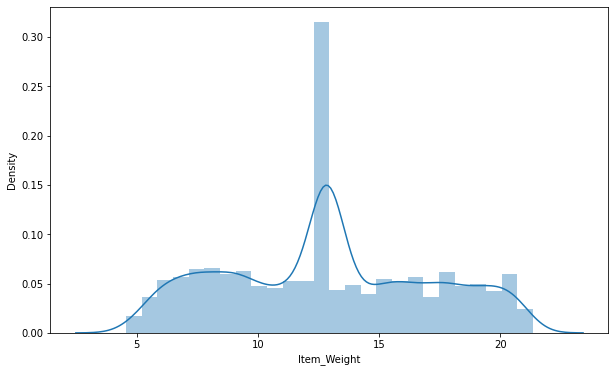

In [ ]:
# Item_Weight distribution
plt.figure(figsize=(10,6))
sns.distplot(bigmart['Item_Weight'])
plt.show()

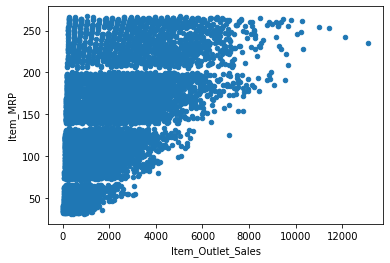

In [ ]:
bigmart.plot.scatter(x="Item_Outlet_Sales", y="Item_MRP")

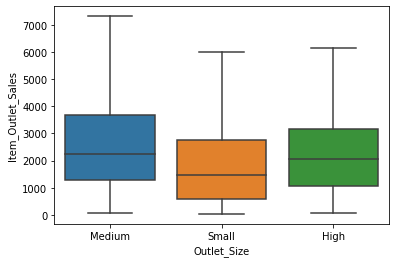

In [ ]:
#Item_Outlet_Sales by Outlet_Size
sns.boxplot(data=bigmart, y="Item_Outlet_Sales",x="Outlet_Size",showfliers = False)

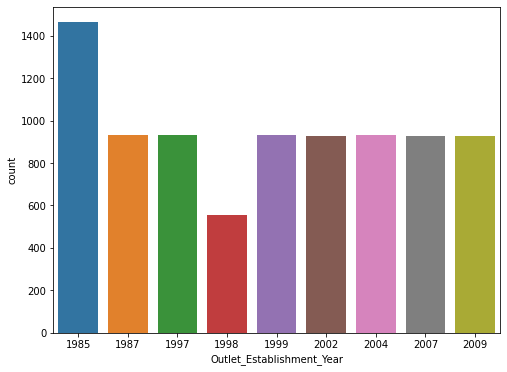

In [ ]:
# Outlet Establishment Year column
plt.figure(figsize=(8,6))
sns.countplot(x='Outlet_Establishment_Year', data=bigmart)
plt.show()

In [ ]:
bigmart['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
bigmart.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [ ]:
bigmart['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
#Changing the string values into numerical values
from sklearn.preprocessing import LabelEncoder
encoding = LabelEncoder()

In [ ]:
bigmart['Item_Identifier'] = encoding.fit_transform(bigmart['Item_Identifier'])

bigmart['Item_Fat_Content'] = encoding.fit_transform(bigmart['Item_Fat_Content'])

bigmart['Item_Type'] = encoding.fit_transform(bigmart['Item_Type'])

bigmart['Outlet_Identifier'] = encoding.fit_transform(bigmart['Outlet_Identifier'])

bigmart['Outlet_Size'] = encoding.fit_transform(bigmart['Outlet_Size'])

bigmart['Outlet_Location_Type'] = encoding.fit_transform(bigmart['Outlet_Location_Type'])

bigmart['Outlet_Type'] = encoding.fit_transform(bigmart['Outlet_Type'])

In [ ]:
bigmart

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,2,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [ ]:
predictors = ["Item_Identifier","Item_Weight","Item_Fat_Content","Item_Visibility","Item_Type","Item_MRP","Outlet_Identifier","Outlet_Establishment_Year","Outlet_Size","Outlet_Location_Type","Outlet_Type"]

In [ ]:
train_data = bigmart.iloc[:7000]
test_data = bigmart.iloc[7001:]

In [ ]:
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300000,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920000,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500000,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200000,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.930000,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
6995,90,9.500000,0,0.085020,7,188.7872,1,1987,0,2,1,1701.7848
6996,447,7.075000,0,0.097661,4,141.8128,0,1998,2,2,0,143.8128
6997,1010,12.857645,0,0.111655,5,157.0630,4,1985,2,0,0,312.9260
6998,572,7.960000,0,0.000000,3,160.7894,2,2007,2,1,1,3235.7880


In [ ]:
# Training the model
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
reg = XGBRegressor()
reg.fit(train_data[predictors],train_data["Item_Outlet_Sales"])

[14:29:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
# Predict the tran data
predict_train_data = reg.predict(train_data[predictors])
# R squared Value
r2_train = metrics.r2_score(train_data["Item_Outlet_Sales"], predict_train_data)

In [ ]:
print('R Squared value of train data = ', r2_train)

R Squared value of train data =  0.6325311602075312


In [ ]:
# Predict the test data
predict_test_data = reg.predict(test_data[predictors])
# R squared Value
r2_test = metrics.r2_score(test_data["Item_Outlet_Sales"], predict_test_data)

In [ ]:
print('R Squared value of test data = ', r2_test)

R Squared value of test data =  0.6023188369856072


In [ ]:
combined = pd.concat([test_data["Item_Outlet_Sales"], pd.Series(predict_test_data, index = test_data.index)], axis=1)
combined.columns = ["actual_sales", "predict_Sales"]
combined

,actual_sales,predict_Sales
7001,3799.0548,3484.527832
7002,5000.8238,4270.418945
7003,399.4800,335.792419
7004,870.8664,2424.656494
7005,484.7024,644.614014
...,...,...
8518,2778.3834,3464.753174
8519,549.2850,1635.003540
8520,1193.1136,1400.789307
8521,1845.5976,1492.501465


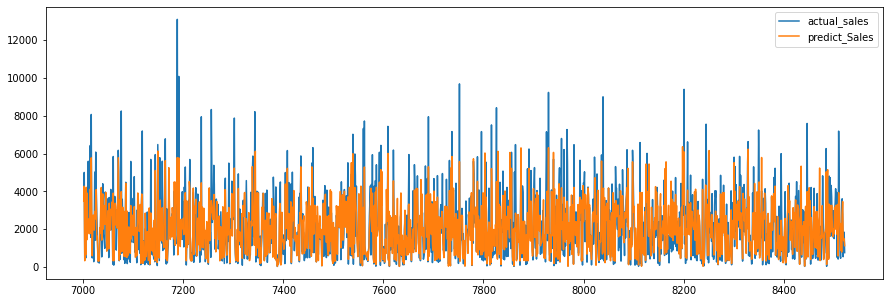

In [ ]:
combined.plot(figsize=(15,5))